To summarise, multiple linear regression has 5 main assumptions:

-----

2 related to the predictors: linear relationship between predictors and response, no multicollinearity

- The first way is to calculate the Pearson correlation matrix between all predictors. 

(correlation between two predictors should be smaller than 0.80.)
- A second way is to calculate the Variance Inflation Factor (VIF). 

(In general, a VIF higher than 10 is a clear indication of multicollinearity, a VIF between 4 and 10 is problematic and can be addressed, a VIF lower than 4 is acceptable.)

-----
1 related to the predictors and the error terms: multivariate normality

- A first assumption of the error terms is called multivariate normality. This assumes that the residuals are normally distributed, which automatically also implies that the variables should be normally distributed. Normality can be tested with Q-Q-plots or simple histograms. You can also use a goodness-of-fit test (e.g., a Kolmogorov-Smirnov test) on the residuals to test for normality. The null hypothesis of such a test is that the data is normally distributed.

- If there is no multivariate normality, then a transformation of the variables (e.g., a logarithmic transformation) is advised.

-----

2 related to the error terms: no autocorrelation and homoscedasticity

- we assume that the error terms are independent, in other words, there is no autocorrelation between the error terms. Autocorrelation can be tested with a scatterplot or with an autocorrelation test (Durbin-Watson test). The null hypothesis for this test is that there is no linear autocorrelation between the error terms.

-  If the error terms are homoscedastic, we see a chaotic scatterplot of the error terms with no real relationship. If there is no homoscedasticity (or heteroscedasticity), we see a pattern in the scatter plot. Often this pattern has a funnel shape and this represents a changing spread of the error terms.

-----

F statistic
If there is no relationship between predictors and response, we expect that  would approximately equal to 1. So, if the alternative hypothesis is true, we expect the F-statistic to be bigger than 1. Another option is to reject the null hypothesis when the p-value is smaller than 0.05.

other question you might ask yourself is: Why not just look at the p-values and if there is one predictor that is significant, we know that at least one predictor is related to the response?

Let us assume that we have many variables (200). There is a rule that states that 5% of the predictors will have very low p-values by chance. Therefore, if we used the p-values on the predictors to test the null hypothesis of our F-test, we would see that 10 variables have a very low p-value. Hence, we would conclude that at least one of the predictors is related to the response. However, this says nothing about the relationship between the predictors and response, because 5% just have a very low p-value by chance.

# Data exploration

Read in the data and make scatter plots between the predictors and the response.

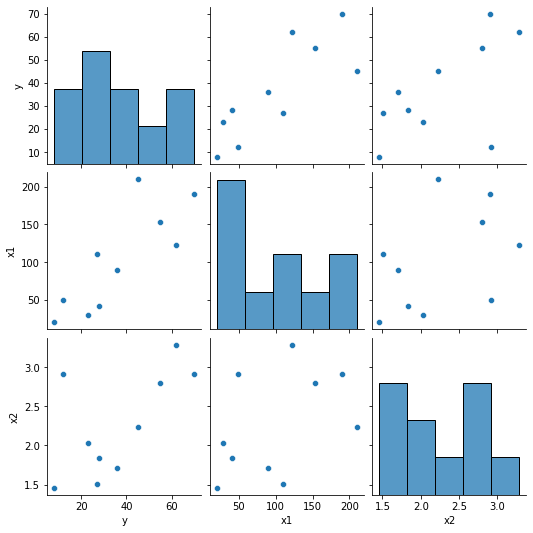

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Make the data
#y are box office revenues, x1: advertising,x2: number of theaters  
#All variables are expressed in 000s
#Linear regression accepts Pandas DataFrame
d = {"y":[23,12,36,27,45,70,55,8,62,28],
     "x1":[29,49,89,110,210,190,153,20,122,41],
     "x2": [2.036,2.919,1.707,1.505,2.232,2.910,2.795,1.46,3.288,1.838]
    }
data = pd.DataFrame(data=d)

#To make a scatter plot of all predictors and response, you can use the seaborn package
import seaborn as sea
sea.pairplot(data)
plt.show()

 From those scatters, there seems to be little correlation between x1 and x2. To be sure about the correlation between x1 and x2, make a correlation matrix.

In [7]:
# In pandas, correlation can be calculated fairly easy
# By default the pearson correlation is calculated
data.corr()

,y,x1,x2
y,1.000000,0.814852,0.628218
x1,0.814852,1.000000,0.436513
x2,0.628218,0.436513,1.000000


Correlation between advertising and number of theatres is low: 0.44.

We also see that the correlation between x1 and x2 and y are bigger than 0.50, which is good since we want to perform regression.

## Simple linear regression

In [8]:
import statsmodels.api as sm

#Add a constant
data_const = sm.add_constant(data)

#Fit an OLS for advertising
lm_ads = sm.OLS(data_const['y'],data_const[['const','x1']]).fit()
print(lm_ads.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     15.81
Date:                Thu, 09 Sep 2021   Prob (F-statistic):            0.00408
Time:                        16:54:12   Log-Likelihood:                -38.624
No. Observations:                  10   AIC:                             81.25
Df Residuals:                       8   BIC:                             81.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.0657      7.603      1.455      0.1

C:\Users\goodsma\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\goodsma\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [9]:
#Fit an OLS for number of theaters
lm_theaters = sm.OLS(data_const['y'], data_const[['const','x2']]).fit()
print(lm_theaters.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     5.216
Date:                Thu, 09 Sep 2021   Prob (F-statistic):             0.0518
Time:                        16:57:36   Log-Likelihood:                -41.567
No. Observations:                  10   AIC:                             87.13
Df Residuals:                       8   BIC:                             87.74
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.4790     20.481     -0.414      0.6

C:\Users\goodsma\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


We see that the lm_ads model has more explanatory power than the lm_theaters model (high R-squared). Also the number of theatres is only significant on the 10% significance level.

## Multiple linear regression

In [12]:
#Function that fits an OLS for advertising and theaters.
#This is done in exactly the same fashion as SLR
def make_mlr(data, xvars, yvars):
    
    lm = sm.OLS(data[yvars], data[xvars]).fit()
    
    return lm

In [13]:
lm_full = make_mlr(data_const,['const','x1','x2'],'y')
print(lm_full.summary())

assert np.allclose(lm_full.params, (-8.48785663,0.20660479,10.64733005))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     10.83
Date:                Thu, 09 Sep 2021   Prob (F-statistic):            0.00720
Time:                        17:06:47   Log-Likelihood:                -37.029
No. Observations:                  10   AIC:                             80.06
Df Residuals:                       7   BIC:                             80.97
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.4879     13.908     -0.610      0.5

C:\Users\goodsma\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Coefficients

We see that x1 (advertising) is significant at the 5% signifance level. If the advertising spending increases with 1 unit (or 1000 Sterling) this implies that the box office revenues would increase on average with 0.2066 (or 206.6 Sterling), while keeping the number of theatres constant.
We see that x2 (number of theatres) is not significant. In the SLR model it was still partially significant (p-value: 0.052), why? This is because advertising and number of theatres are correlated. In the SLR, the effect of number of theatres is actually not due to the number of theatres. It is because producers are spending more money on advertising that more theatres are playing the film, which is driving box office sales. In the SLR model, the number of theatres is getting credit for the effect of advertising on box office sales.

Performance

The model performance of the MLR model is better than the two seperate models in terms of R-squared (0.76 vs 0.66 and 0.40). However, when comparing models, it is better to look at the adjusted R-squared since this corrects the R-squared for adding extra variables. When we look at the adjusted R-squared, we see that the MLR model improves model performance. However the difference with the SLR model on advertising is small (0.68 vs 0.62)
The F-test is significant (p-value: 0.007), so this tells us that at least 1 of the predictors is related to the response (advertising in this case).

Assumptions

The linear relationship betwen predictors and response is already tested by the pair plots in the data exploration part.
Multicollinearity is also tested in the data exploration part. We saw that the correlation between advertising and number of theatres was 0.44 which is smaller than 0.80. However, a better way is to calculate the VIF (variance inflation factor). The VIFs of the predictors are low (below 4), only the VIF of the intercept is high. We are only interested in the VIF of the predictors, so a large VIF for the intercept is not problematic.

In [23]:
#Use the variance inflation factor from the statsmodels package
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Extract the predictors and calculate the VIFs
variables = lm_full.model.exog

def calculate_vif(variables):
    vif = pd.DataFrame()
    vif['VIF'] = [variance_inflation_factor(variables,i) for i in range(variables.shape[1])]
    vif['Predictor'] = lm_full.model.exog_names
    
    return vif

In [24]:
vifs = calculate_vif(variables)
print(vifs)

         VIF Predictor
0  14.054124     const
1   1.235397        x1
2   1.235397        x2


Multivariate normality can be tested in a couple of ways. First, the histograms in the data exploration phase did not really show a normal distribution. Second, we can make a QQ-plot of the residuals. We see that the blue dots are not exactly on the red line, which is also an indication of no normal distribution. Finally, we can perform a normality test such as a Kolmogorov–Smirnov test. This test has as a null hypothesis that the data is normally distributed. We see that the p-value of the K-S test is 0.0009 thereby rejecting the null hypothesis of a normal distribution. To mitigate this problem, we could do variable transformations like a log transformation. However, in this case, we only have 10 observations, so gathering more obsverations might be a good solution.

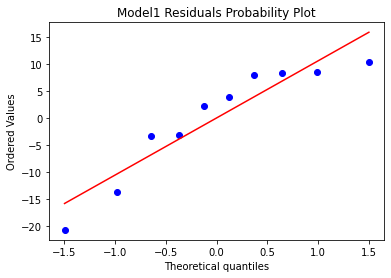

KstestResult(statistic=0.5829140326147028, pvalue=0.000931893288038146)

In [27]:
#Make a QQ-plot of the residuals
from scipy import stats

stats.probplot(lm_full.resid, plot=plt)
plt.title('Model1 Residuals Probability Plot')
plt.show()

#Do a K-S test
stats.kstest(lm_full.resid, 'norm')

Autocorrelation can be tested with the Durbin-Watson test. The D-B test statistic can be seen in the output of MLR. Values between 1.5 and 2.5 are often seen as normal and serve as an indication for no autocorrelation problem.

Finally, we want to test for heteroscedasticity. This can be tested by making a residual plot, which plots the residuals against the fitted values. If there is no pattern in the residuals, then there is no heteroscedasticity. From the residual plot, we cannot detect a funnel shape.

C:\Users\goodsma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


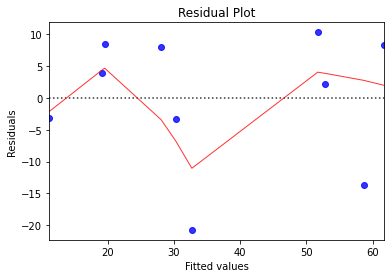

In [32]:
#Make a residual plot with the seaborn package
#Lowess adds a scatter smoother
plot_resid = sea.residplot(lm_full.fittedvalues, 'y', data=data_const,lowess=True,scatter_kws={'color':'blue'}, line_kws={'color':'red','lw':1,'alpha':0.8})

plot_resid.axes.set_title('Residual Plot')
plot_resid.axes.set_xlabel('Fitted values')
plot_resid.axes.set_ylabel('Residuals')

plt.show()